# Ruina gracza
Proszę dla obydwu graczy narysować trajektorie liczby wygranych (całych rozgrywek!) w funkcji liczby gier dla kilku wybranych parametrów a, b, p (przy a+b=100).

(To tzw. proces liczący. Trajektorie będą krzywymi niemalejącymi.)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def single_game(a_fortune, b_fortune, p):
    while a_fortune > 0 and b_fortune > 0:
        a_status = np.random.uniform(0, 1) < p
        a_fortune += 1 if a_status else -1
        b_fortune += -1 if a_status else 1        
    return a_fortune > 0, b_fortune > 0

In [3]:
def simulation(game_num, a_fortune, b_fortune, p):
    a_wins_list = [0]
    b_wins_list = [0]
    a_wins = 0
    b_wins = 0
    for _ in range(game_num):
        wins = single_game(a_fortune, b_fortune, p)
        a_wins += wins[0]
        b_wins += wins[1]
        a_wins_list.append(a_wins)
        b_wins_list.append(b_wins)
    return a_wins_list, b_wins_list

In [4]:
def draw_plot(a_init_fortune, b_init_fortune, p):
    game_num = 100
    
    players_wins_data = simulation(game_num, a_init_fortune, b_init_fortune, p)
    
    x = np.arange(0, game_num + 1, 1)
    
    plt.figure(figsize=(9,5))
    plt.plot(x, players_wins_data[0], label='Player A')
    plt.plot(x, players_wins_data[1], label='Player B')
    
    plt.title(f'Player A init fortune = {a_init_fortune} and probability {p}')
    plt.xlabel('Played games')
    plt.ylabel('Wins number')
    plt.legend()
    plt.show()

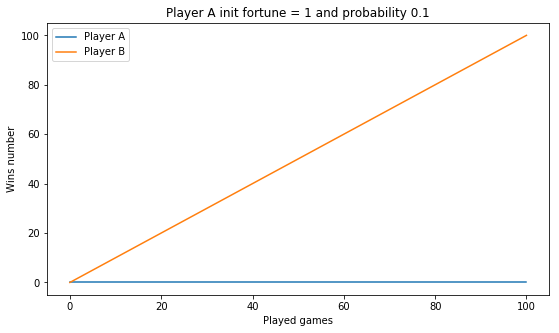

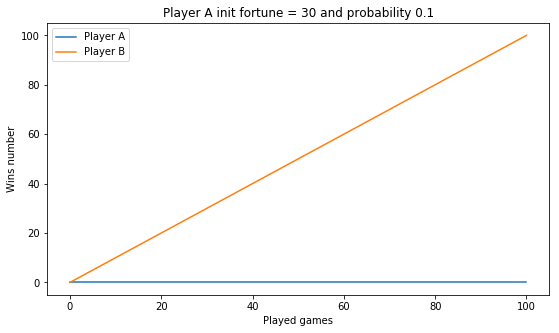

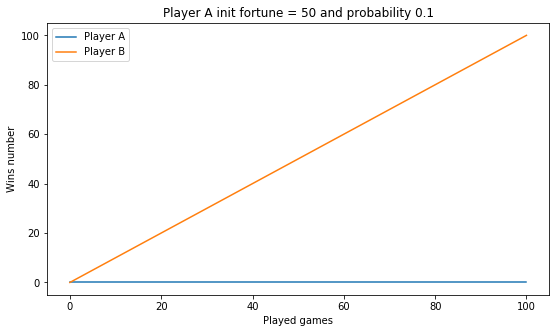

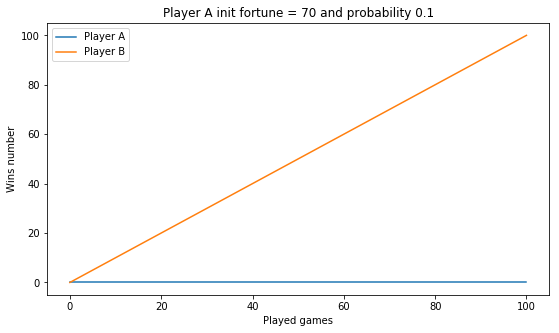

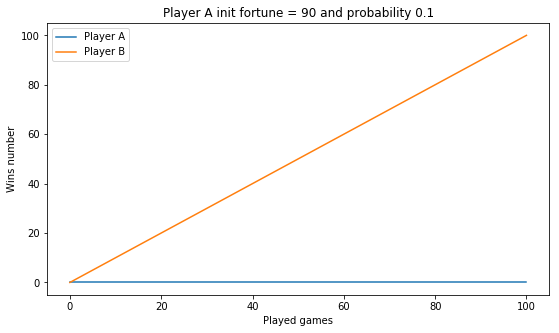

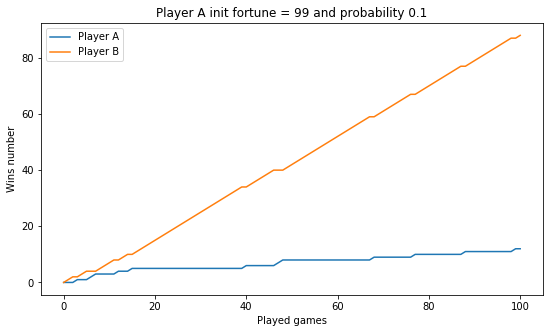

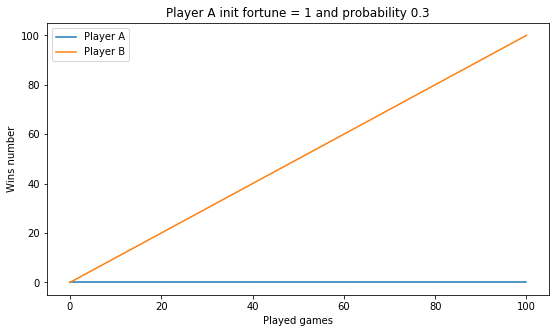

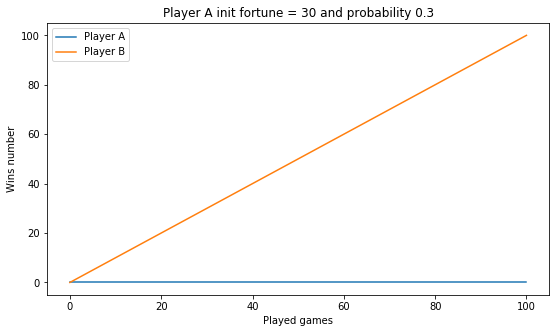

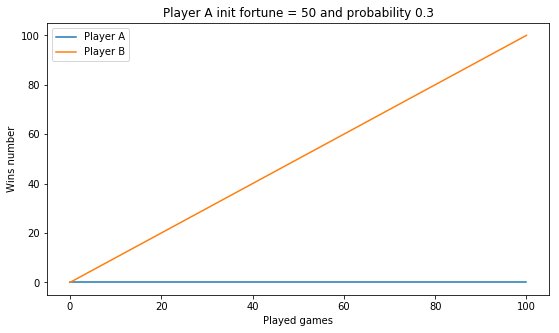

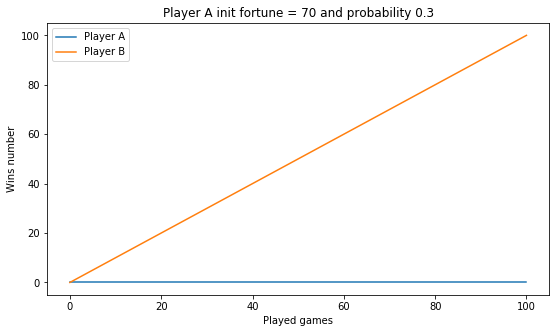

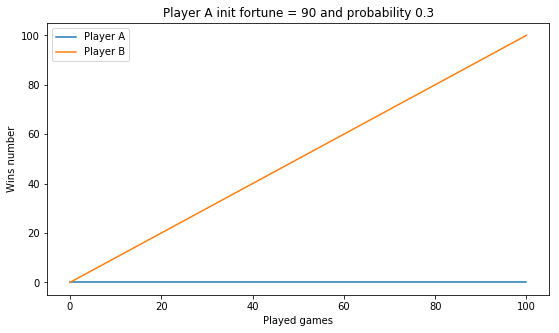

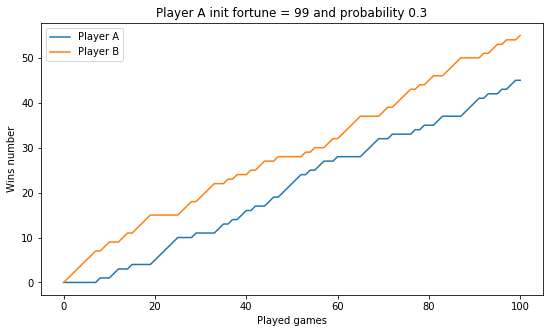

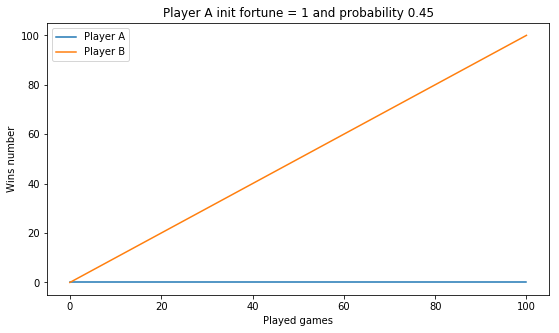

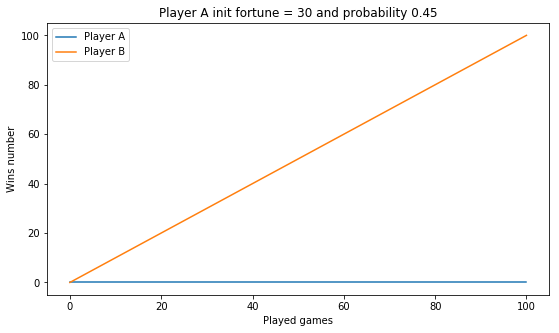

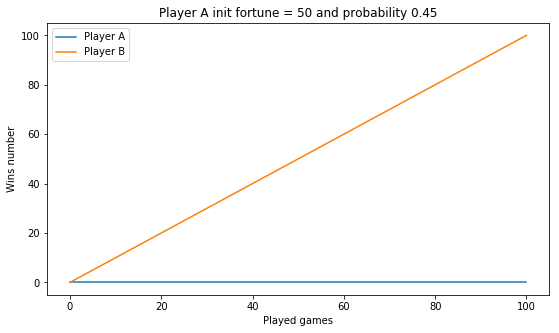

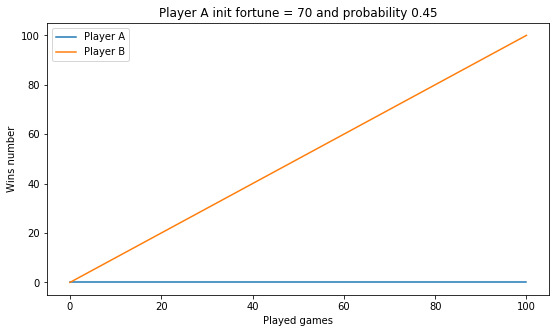

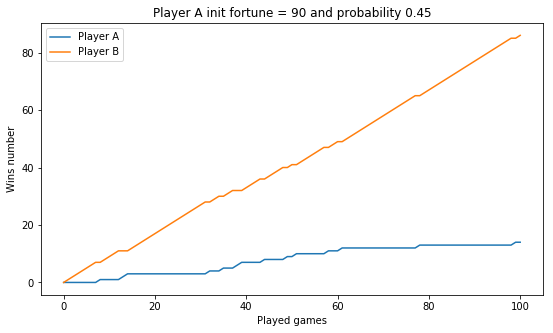

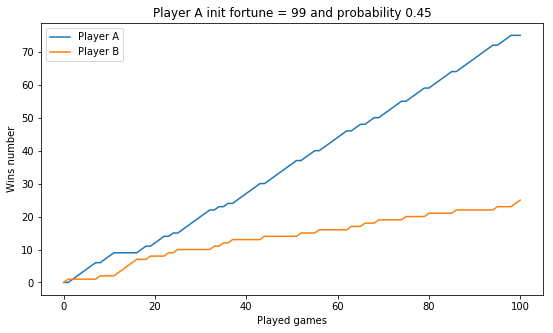

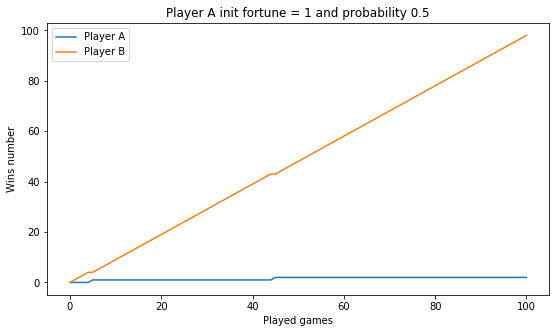

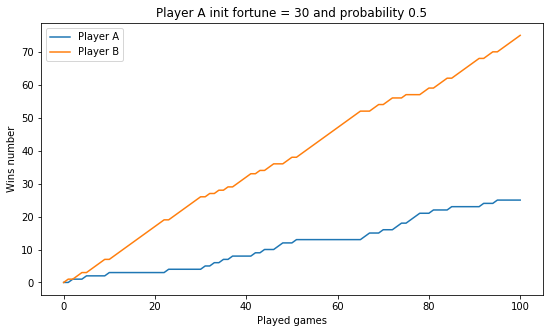

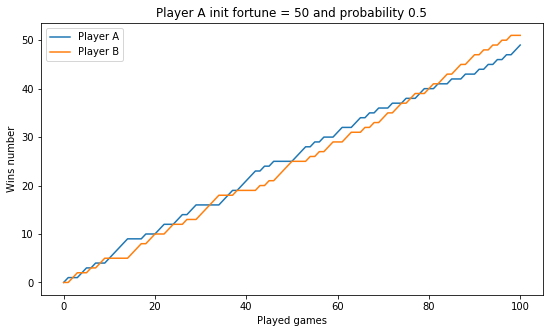

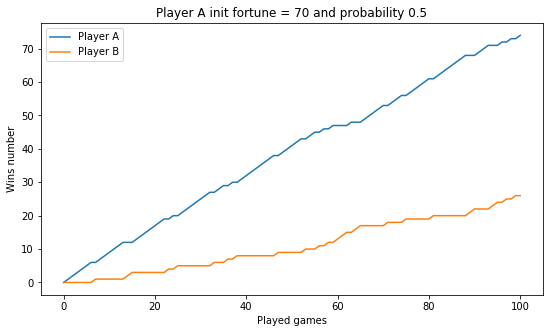

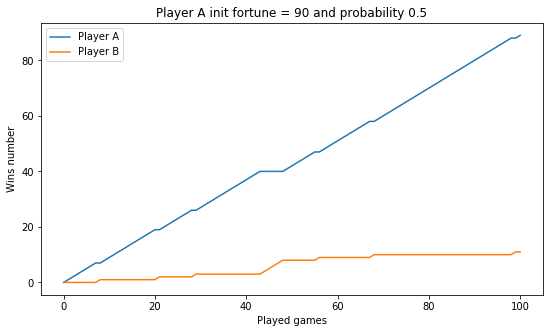

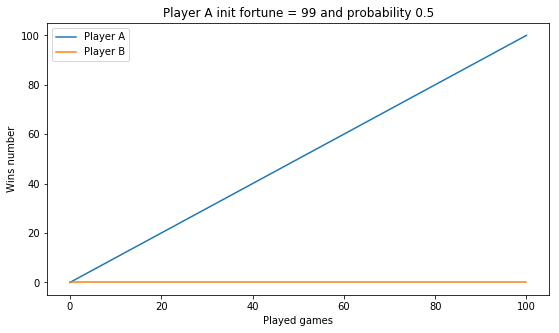

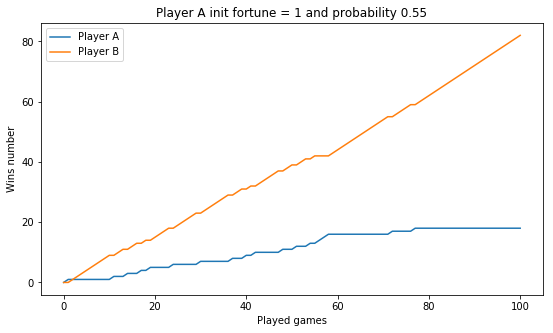

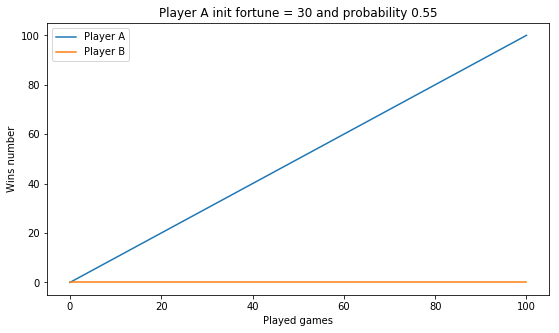

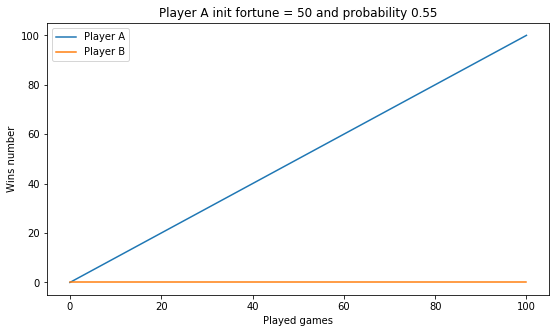

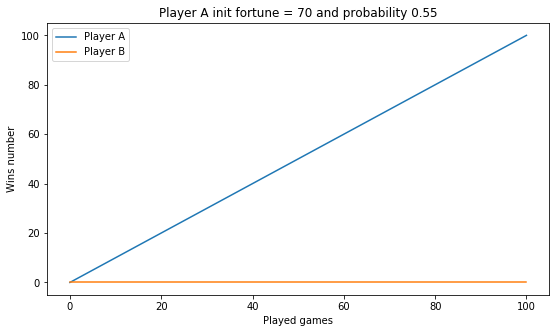

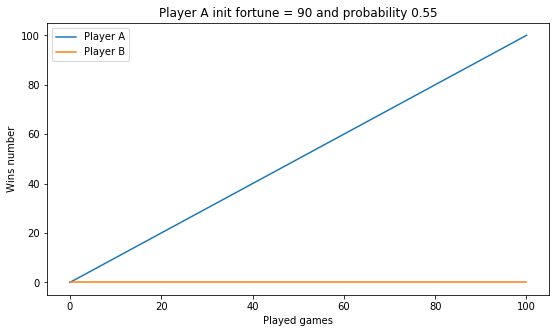

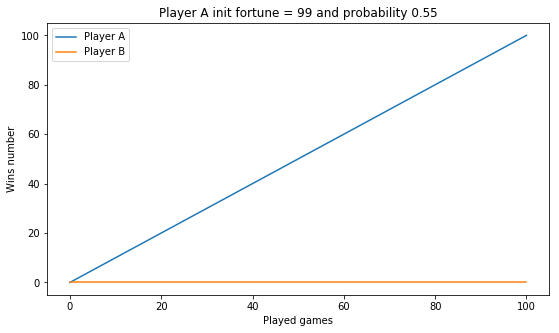

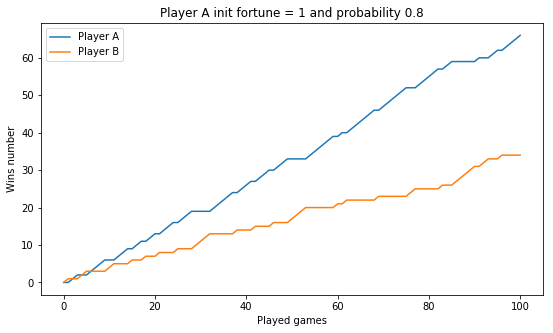

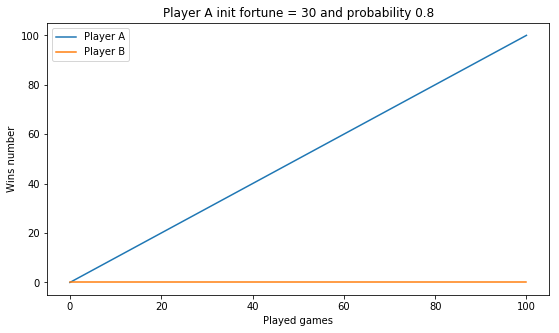

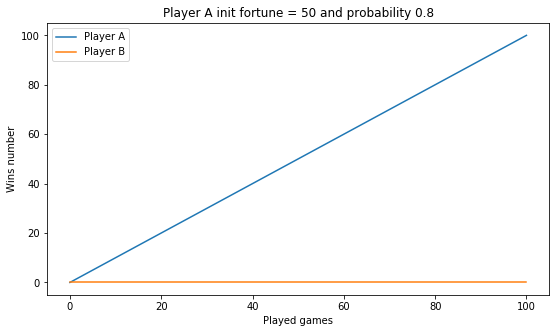

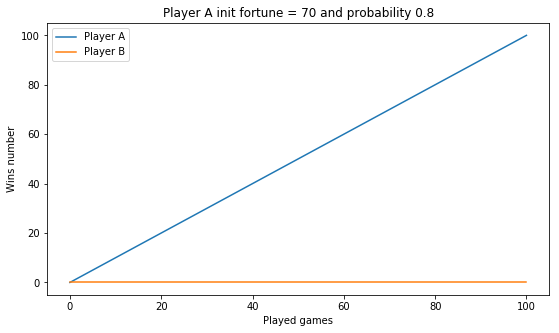

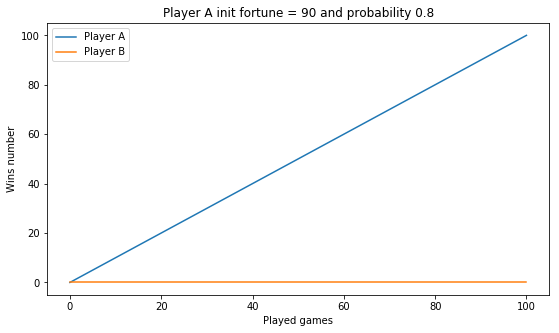

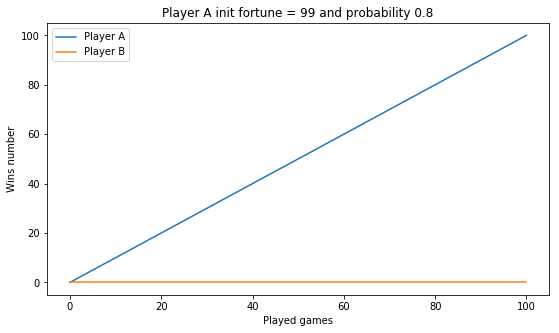

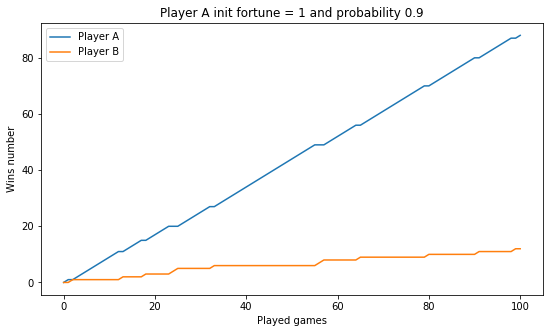

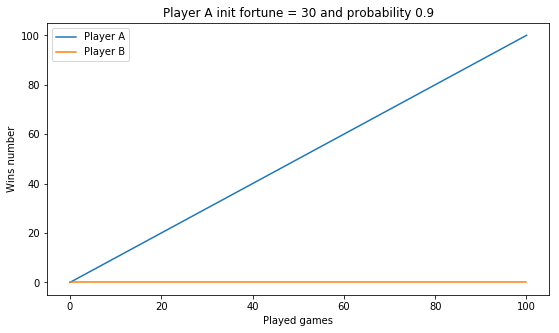

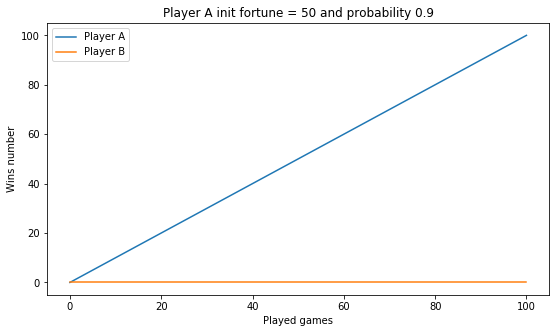

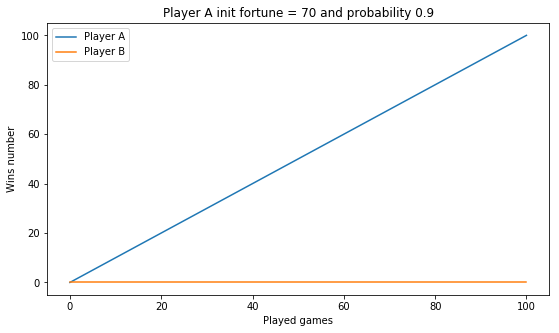

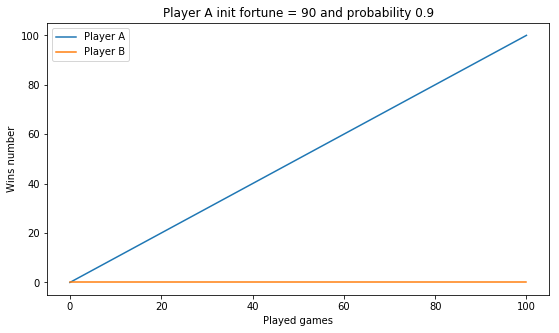

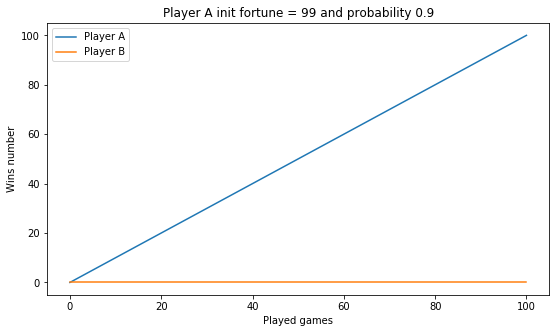

In [5]:
a_init_fortunes = [1, 30, 50, 70, 90, 99]
probs = [0.1, 0.3, 0.45, 0.5, 0.55, 0.8, 0.9]

for p in probs:
    for a_init_fortune in a_init_fortunes:
        draw_plot(a_init_fortune, 100 - a_init_fortune, p)